## Natural Language Processing

**Natural Language Processing** as kmown as **NLP** is a branch of Artificial Intelligence which deal with bridging the machines understanding humans in their Natural Language.NLP can enable humans to communicate to machines in a natural way.

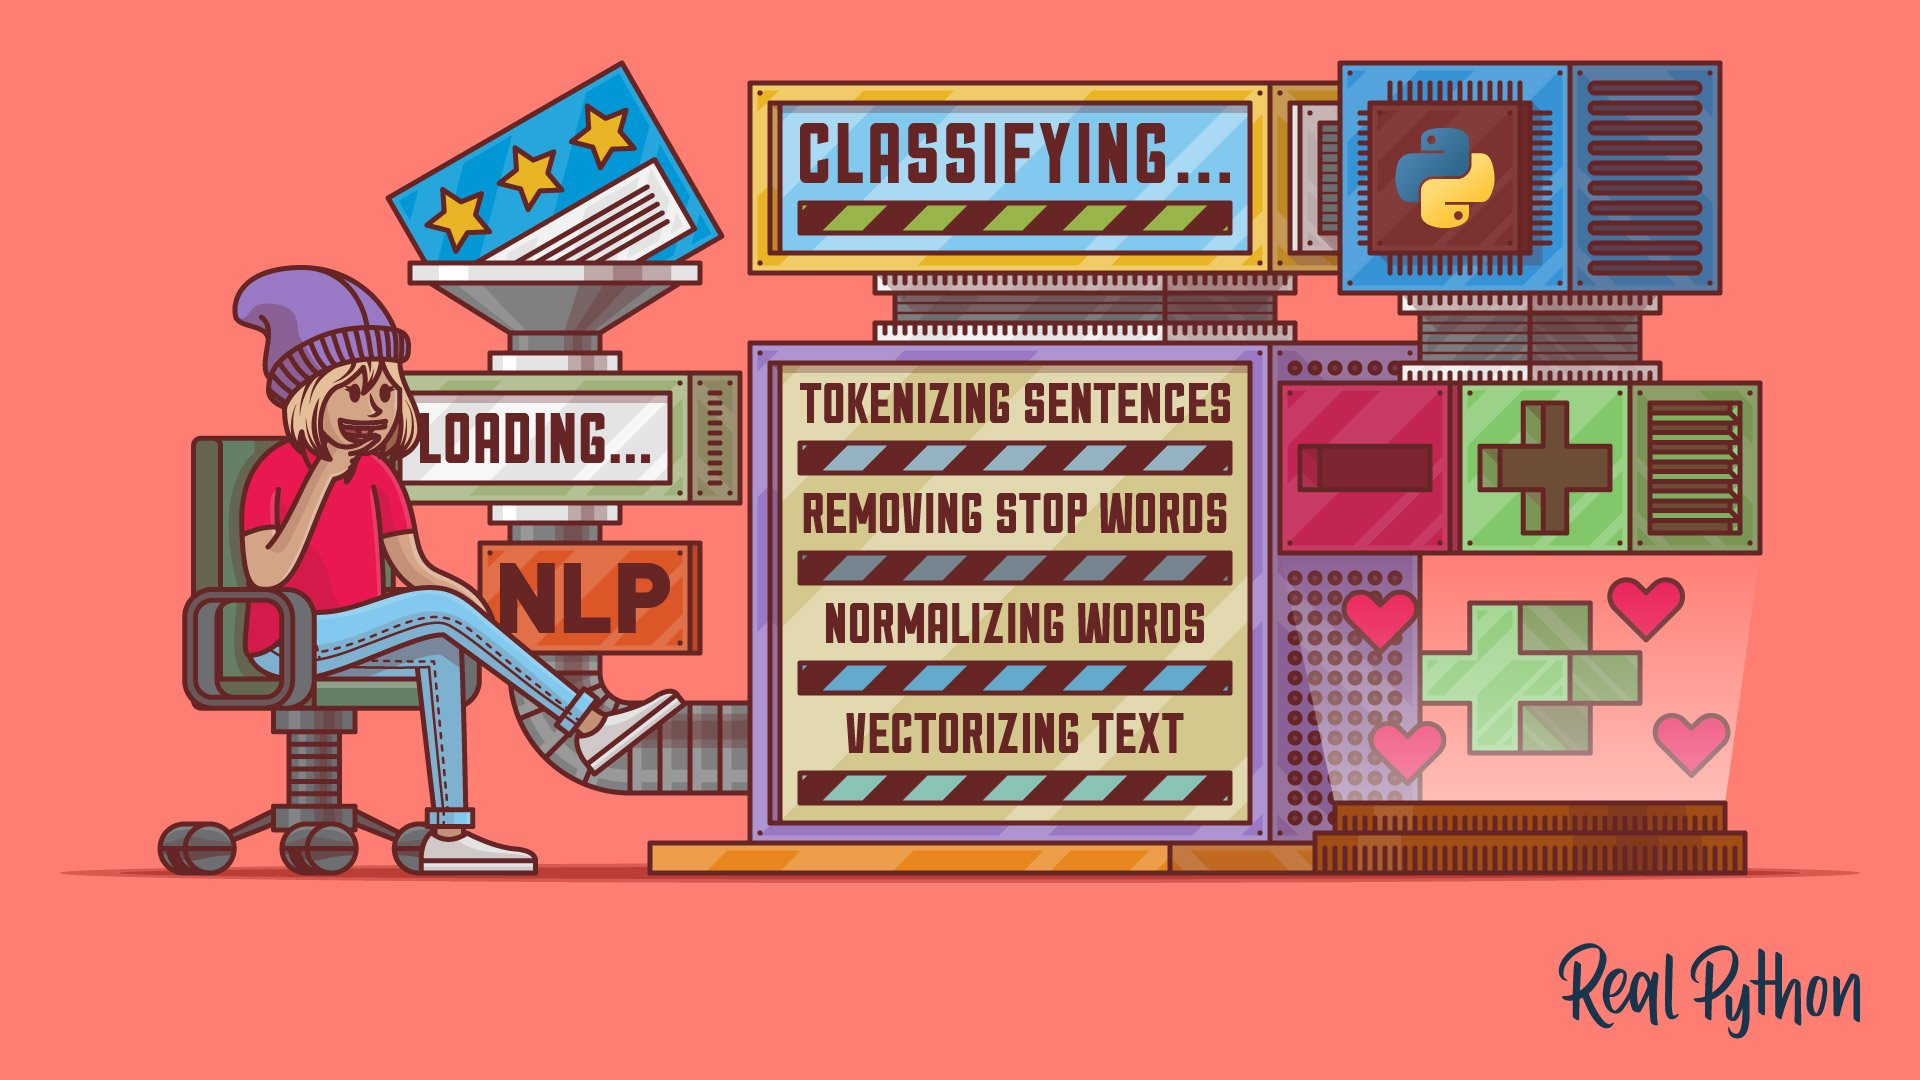

**Emotion Detection and Recognition** from text is a recent field of research that is closely related to **Sentiment Analysis**. Sentiment Analysis aims to detect positive, neutral, or negative feelings from text, whereas Emotion Analysis aims to detect and recognize types of feelings through the expression of texts, such as anger, disgust, fear, happiness, sadness, and surprise.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv


## 1. Reading the dataset

In [2]:
data=pd.read_csv('/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Observations: What we see here is we have two columns of data :

**Message** - The text message which is to be categorized

**Category** - The classification whether the text message is a spam or not spam

Now let us explore the data we having here...

In [3]:
import random
random_idx_list = [random.randint(1,len(data.Message)) for i in range(10)] # creates random indexes to choose from dataframe
data.loc[random_idx_list,:].head(10)

,Category,Message
1344,ham,Crazy ar he's married. Ü like gd looking guys ...
1347,ham,Is it ok if I stay the night here? Xavier has ...
4382,ham,Mathews or tait or edwards or anderson
3701,ham,Oh...i asked for fun. Haha...take care. ü
1370,ham,Did you try making another butt.
1308,spam,"Get 3 Lions England tone, reply lionm 4 mono o..."
700,ham,K..u also dont msg or reply to his msg..
2998,ham,Don know..he is watching film in computer..
3776,ham,Hi! You just spoke to MANEESHA V. We'd like to...
1018,ham,Shall i send that exe to your mail id.


Looks like we have a nasty data in text. Because in general we use lot of punctuations and other words without any contextual meaning. It have no value as feature to the model we are training. So we need to get rid of them.

## 2. Cleaning the message

Tweet texts often consists of other user mentions, hyperlink texts, emoticons and punctuations. In order to use them for learning using a Language Model. We cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleansing methods. 

So what methods should we adopt to clean out our message? Let's keep looking.

1. Firstly, we need to take a look into the text message to find if there are any unwanted url links. This information is generally not useful- so we shall be removing them i the first step\
1. Symbols- For a text classifier- we genrally tend to remove all the punctuatuions, as they are of no use in a text predictor
1. Lets remove all other characters than alphabets-numbers wont be a crucial input to the algorithm.
1. Finally, we will need to lemmatize the words.

### Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

Text preprocessing includes both Stemming as well as Lemmatization. Many times people find these two terms confusing. Some treat these two as same. Actually, lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

Applications of lemmatization are:

* Used in comprehensive retrieval systems like search engines.
* Used in compact indexing

NLTK is a python library which got functions to perform text processing task for NLP.

In [4]:
import re
import nltk 
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [5]:
stop_words = stopwords.words('english')
wordnet = WordNetLemmatizer()
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [6]:
def preprocess(text, lemmatize=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if lemmatize:
        tokens.append(wordnet.lemmatize(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [7]:
data.Message = data.Message.apply(lambda x: preprocess(x))

**Finally... It is clean and tidy now. Now let's see some word cloud visualizations of it.**

## 3. Text Visualization

### Ham Words

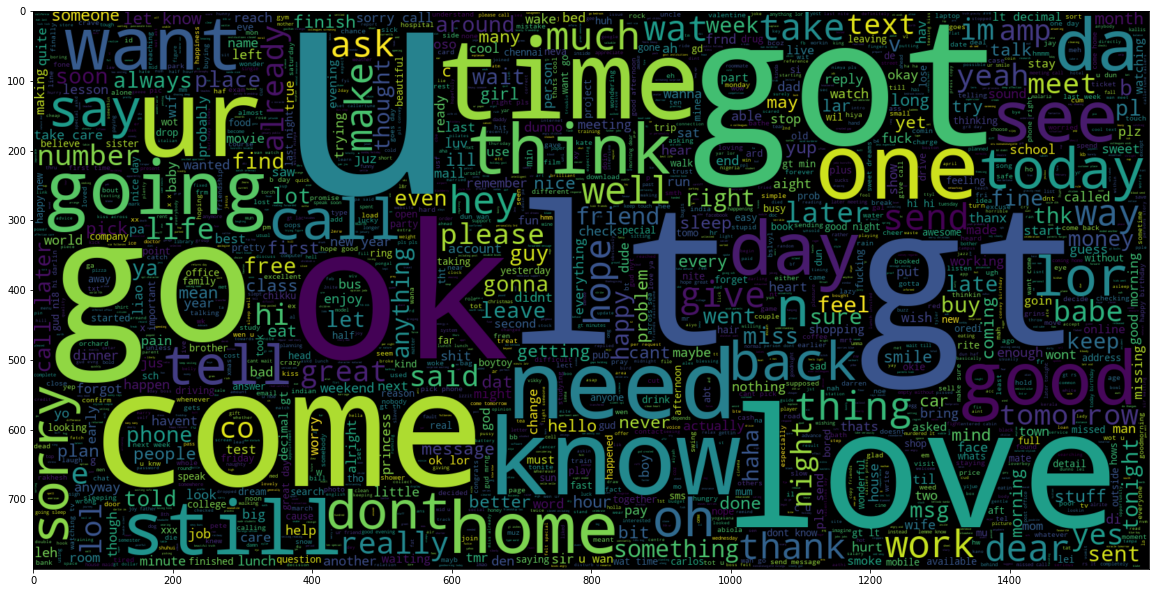

In [8]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Category == 'ham'].Message))
plt.imshow(wc , interpolation = 'bilinear')

### Spam Words

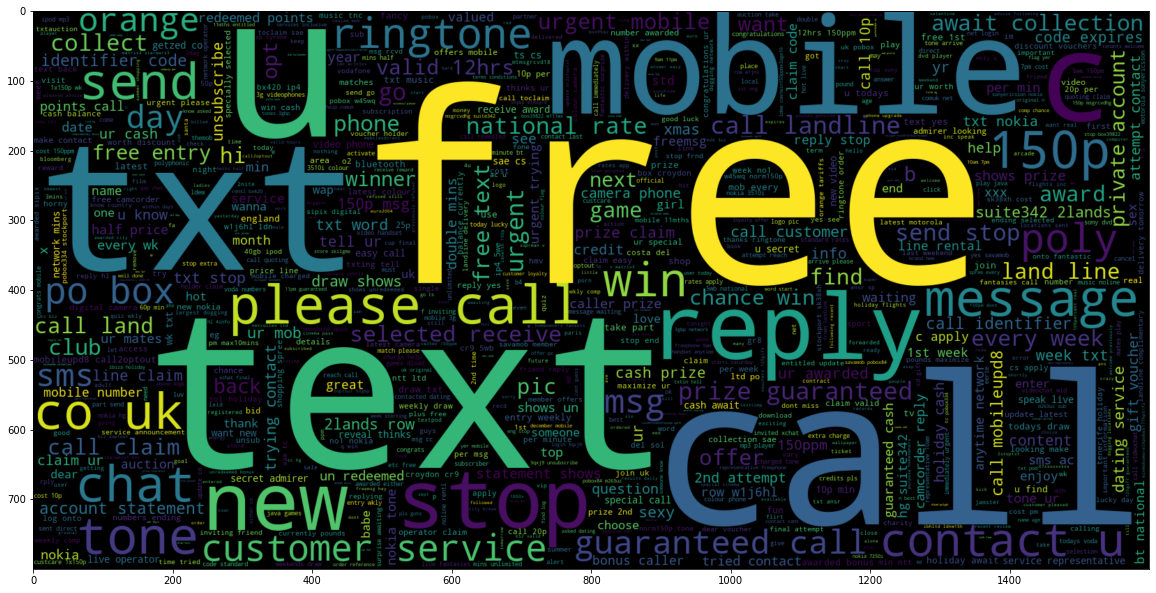

In [9]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Category == 'spam'].Message))
plt.imshow(wc , interpolation = 'bilinear')

LOL... we can see the word such as **free,call,mobile**. It's common to see in spam letter for deceiving.

## 4. Data Preprocessing

### Train and Test Split

In [10]:
max_words = 1000
max_len = 150

In [11]:
from sklearn.model_selection import train_test_split

train_data,test_data = train_test_split(data,test_size=0.2,random_state=0)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 4457
Test Data size 1115


In [12]:
train_data.head(10)

,Category,Message
1114,ham,good movie ok leave hourish
3589,ham,free give otherwise nalla adi entey nattil kittum
3095,ham,emigrated something ok maybe 5 30 bit hopeful
1012,ham,got home babe still awake
3320,ham,kay since already
4130,ham,workin get job
1197,ham,said matter mind saying matter
5426,ham,oh yeah diet flew window
624,ham,sorry got things may pub later
2260,ham,ill call evening ill ideas


### Tokenization

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation. The process is called **Tokenization**.

In [13]:
from keras.preprocessing.text import Tokenizer

tok = Tokenizer()
tok.fit_on_texts(train_data.Message)

word_index = tok.word_index
vocab_size = len(tok.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 7658


Since we are going to build a sequence model. We should feed in a sequence of numbers to it. And also we should ensure there is no variance in input shapes of sequences. It all should be of same lenght. But texts in tweets have different count of words in it. To avoid this, we seek a little help from pad_sequence to do our job. It will make all the sequence in one constant length max_len.

In [14]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(tok.texts_to_sequences(train_data.Message),maxlen = max_len)
X_test = pad_sequences(tok.texts_to_sequences(test_data.Message),maxlen = max_len)

print("Training X Shape:",X_train.shape)
print("Testing X Shape:",X_test.shape)

Training X Shape: (4457, 150)
Testing X Shape: (1115, 150)


### Label Encoding

We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification).

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data.Category.to_list())

y_train = le.transform(train_data.Category.to_list())
y_test = le.transform(test_data.Category.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (4457, 1)
y_test shape: (1115, 1)


### Word Emdedding

**Word Embedding** is one of the popular representation of document vocabulary.It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

Basically, it's a feature vector representation of words which are used for other natural language processing applications.

We could train the embedding ourselves but that would take a while to train and it wouldn't be effective. So going in the path of Computer Vision, here we use **Transfer Learning**. We download the pre-trained embedding and use it in our model.

The pretrained Word Embedding like **GloVe & Word2Vec** gives more insights for a word which can be used for classification.

In this notebook, I use **GloVe Embedding from Stanford AI** in this model.

In [16]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [17]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-08-27 14:21:29--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-08-27 14:21:29--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-08-27 14:21:30--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [18]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [19]:
GLOVE_EMB = '/kaggle/working/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 128
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [20]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [21]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

## 5. Model Training - LSTM
* **Reccurent Neural Networks** can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case,the Neural Network outputs a scalar value prediction.

* **Long Short Term Memory networks** – usually just called **LSTMs** – are a special kind of **RNN**, capable of learning long-term dependencies. They work tremendously well on a large variety of problems, and are now widely used.

* LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behaviour.

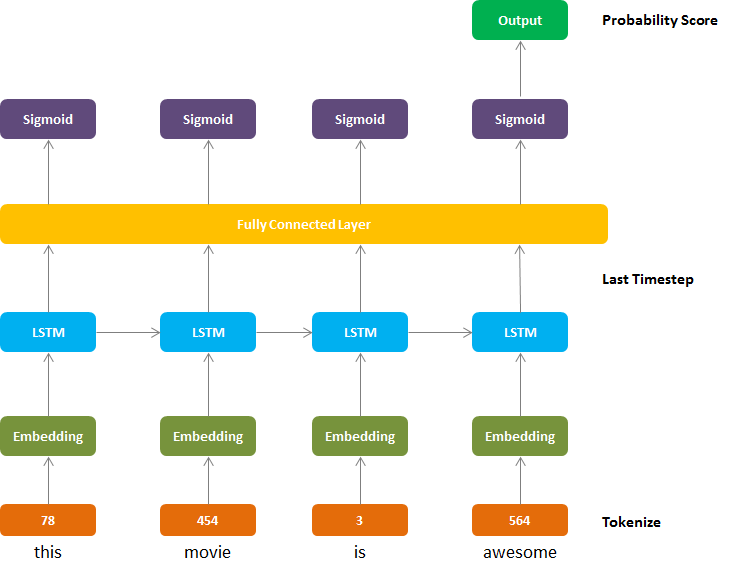

For model architecture, we use

1) **Embedding Layer** - Generates Embedding Vector for each input sequence.

2) **LSTM** - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

3) **Dense** - Fully Connected Layers for classification

In [22]:
embedding_layer = Embedding(vocab_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False)

In [23]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = embedding_layer(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256)(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [24]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 300)          2297400   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                93440     
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [25]:
history = model.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.2)
history

Epoch 1/10
28/28 [==============================] - 10s 269ms/step - loss: 0.3609 - accuracy: 0.8367 - val_loss: 0.0778 - val_accuracy: 0.9776
Epoch 2/10
28/28 [==============================] - 7s 235ms/step - loss: 0.0741 - accuracy: 0.9786 - val_loss: 0.0709 - val_accuracy: 0.9776
Epoch 3/10
28/28 [==============================] - 6s 230ms/step - loss: 0.0552 - accuracy: 0.9835 - val_loss: 0.0567 - val_accuracy: 0.9854
Epoch 4/10
28/28 [==============================] - 6s 227ms/step - loss: 0.0393 - accuracy: 0.9904 - val_loss: 0.0761 - val_accuracy: 0.9765
Epoch 5/10
28/28 [==============================] - 7s 234ms/step - loss: 0.0308 - accuracy: 0.9918 - val_loss: 0.0608 - val_accuracy: 0.9809
Epoch 6/10
28/28 [==============================] - 6s 227ms/step - loss: 0.0235 - accuracy: 0.9935 - val_loss: 0.0590 - val_accuracy: 0.9854
Epoch 7/10
28/28 [==============================] - 6s 222ms/step - loss: 0.0156 - accuracy: 0.9964 - val_loss: 0.0656 - val_accuracy: 0.9821
Epoch

## 6. Model Evaluation
Now that we have trained the model, we can evaluate its performance. We will some evaluation metrics and techniques to test the model.

Let's start with the **Learning Curve of loss and accuracy** of the model on each epoch.

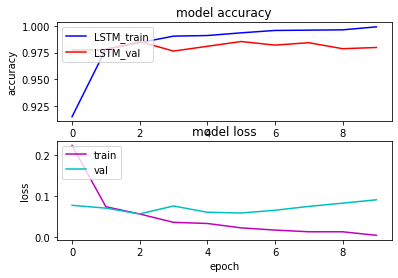

In [26]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

The model will output a prediction score between 0 and 1. We can classify two classes by defining a threshold value for it. In our case, I have set 0.5 as THRESHOLD value, if the score above it. Then it will be classified as **Spam**.

In [27]:
def decode_sentiment(score):
    return 'spam' if score>0.5 else 'ham'


scores = model.predict(X_test,verbose=1,batch_size=128)
y_pred = [decode_sentiment(score) for score in scores]

9/9 [==============================] - 1s 99ms/step


**Confusion Matrix**

Confusion Matrix provide a nice overlook at the model's performance in classification task

In [28]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

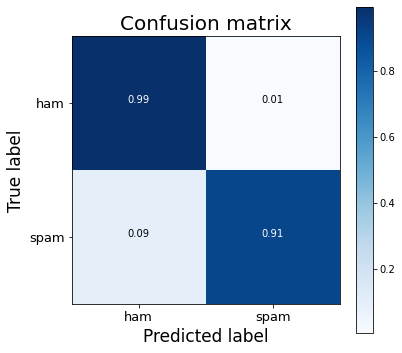

In [29]:
cnf_matrix = confusion_matrix(test_data.Category.to_list(), y_pred)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.Category.unique(), title="Confusion matrix")
plt.show()

**Classification Scores**

In [30]:
print(classification_report(list(test_data.Category), y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       955
        spam       0.96      0.91      0.93       160

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

